# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<br/>
<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

<br/>
<br/>

<center><i><b>
Atenção: não são autorizadas cópias, divulgações ou qualquer tipo de uso deste material sem o consentimento prévio dos autores.
</center></i></b>

# <center>Exercício - Máquinas de Vetores de Suporte</center>

Instruções
----------

Este arquivo contém o código que auxiliará no desenvolvimento do exercício. Você precisará completar as seguintes funções:

* `create_SVM_model()`
* `fit_model_and_predict()`
* `holdout()`
* `grid_search_cross_validation()`
* `calculate_metrics()`

Você não poderá criar nenhuma outra função. Apenas altere as rotinas fornecidas.

Introdução
----------
Neste *notebook*, usaremos o método **máquinas de vetores de suporte (SVM)** com vários exemplos em 2D. 

Faremos um experimento completo, separando a base em treino e teste, encontrando os melhores parâmetros do SVM através de um grid-search com K-fold e calculando diferentes para avaliar a qualidade da classificação. Todas as implementações serão feitas através da biblioteca `sklearn`.

Os experimentos que serão apresentados foram projetados com o intuito de facilitar o entendimento de como o SVM funciona na prática e como empregar diferentes funções de kernel, assim como aprender a usar a interface do `sklearn`, uma das bibliotecas mais populares e completas de Aprendizado de Máquina para Python.

## Parte 1: Visualizando as amostras da base de dados 1

O primeiro exemplo é baseado em uma base de dados cujas classes podem ser separadas usando um classificador linear. 

Primeiro, vamos carregar os dados do arquivo.

In [1]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = "dados"

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes e análise de dados
import os # importa a biblioteca para tarefas relacionadas ao sistema operacional

if __name__ == '__main__':
    # importa a biblioteca matplotlib
    import matplotlib.pyplot as plt

    # importa o arquivo e guarda em um dataframe do Pandas
    df_dataset = pd.read_csv(os.path.join(FILES_DIRECTORY, 'data1.csv'), sep=',', index_col=None, header=None)    
    print('Dados carregados com sucesso!')

Dados carregados com sucesso!


Agora, vamos dar uma olhada nas 5 primeiras amostras da base de dados.

In [2]:
if __name__ == "__main__":
    # vamos usar a função display para imprimir o dataframe
    display(df_dataset.head(n=6))

,0,1,2
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1
5,4.0150,3.1937,1


Vamos guardar os dados dentro de uma matriz e as classes dentro de um vetor.

In [3]:
if __name__ == "__main__":
    # pega os valores das n-1 primeiras colunas e guarda em uma matrix X
    X = df_dataset.iloc[:, 0:-1].values 

    # pega os valores da última coluna e guarda em um vetor Y
    Y = df_dataset.iloc[:, -1].values 

    # imprime as 5 primeiras linhas da matriz X
    display('X:', X[0:5,:])

    # imprime os 5 primeiros valores de Y
    print('Y:', Y[0:5])

'X:'

array([[1.9643, 4.5957],
       [2.2753, 3.8589],
       [2.9781, 4.5651],
       [2.932 , 3.5519],
       [3.5772, 2.856 ]])

Y: [1 1 1 1 1]


Agora, vamos visualizar os dados.

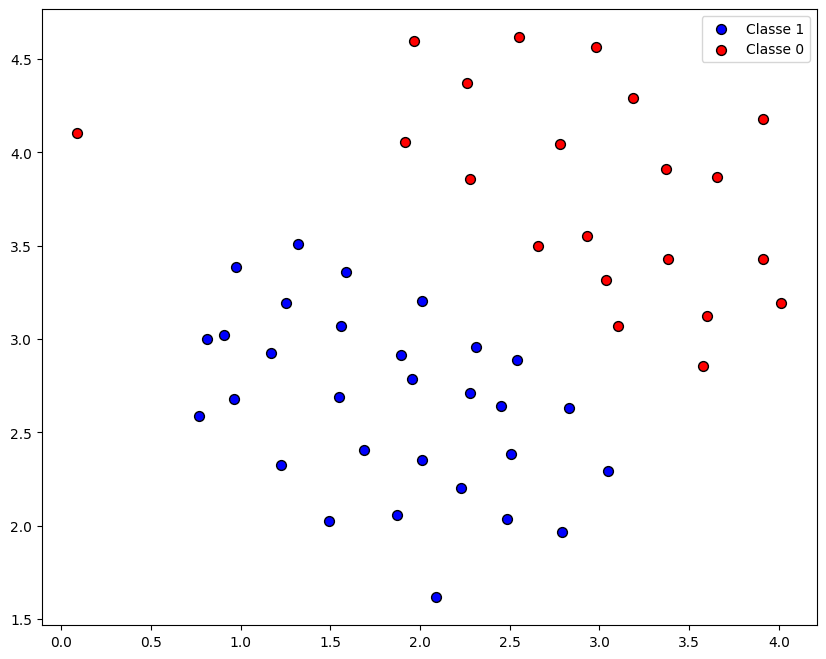

In [4]:
#função para plotar os dados
def visualizarDados(X,Y):
    """
    Função usada para plotar os dados
    """
    
    # define o tamanho da figura 
    plt.figure(figsize=(10,8))
    
    # plota os dados da classe 0
    plt.scatter( X[Y==0,0], X[Y==0,1], label='Classe 1', color='blue', s=50, edgecolors='k') 
    
    # plota os dados da classe 1
    plt.scatter( X[Y==1,0], X[Y==1,1], label='Classe 0', color='red', s=50, edgecolors='k') 
        
    # plota a legenda
    plt.legend()
    
if __name__ == "__main__":
    # chama a função que plota os dados   
    visualizarDados(X,Y)
    plt.show()

## Parte 2: Treinando um SVM com kernel linear

Em seguida, vamos inicializar e treinarum classificador SVM com kernel linear. Para isso, iremos utilizar a biblioteca **scikit-learn**, a biblioteca mais famosa e completa para implementar algoritmos de IA e Aprendizado de Máquina em Python.

Existem várias formas de instalar a biblioteca:
 - ela pode ser instalada por meio do PyPI por meio do seguinte comando:
     - `pip install -U scikit-learn`
 - a biblioteca já vem instalada dentro do ambiente Anaconda, mas pode ser reinstalado por meio de:
     - `conda install -c anaconda scikit-learn`     
 - ela pode ser instalada no Linux Ubuntu através do comando:
     - `sudo apt-get install python3-sklearn python3-sklearn-lib python3-sklearn-doc`
     
Em muitos dos exercícios presentes nesse notebook, será necessário consultar a documentação da biblioteca. A explicação completa de cada uma de suas classes e objetos, junto com guias de utilização, encontram-se em: https://scikit-learn.org/stable/index.html

Inicialmente, você deverá completar a função `create_SVM_model()`. A função irá receber diversos parâmetros do modelo, e você deverá retornar um objeto `sklearn.svm.SVC` instanciado, com os parâmetros adequados em sua construção. A documentação da classe pode ser encontrada [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [6]:
def create_SVM_model(C_reg, kernel_type, gamma_coefficient, random_seed):
    """
    Retorna um objeto SVC com os parâmetros corretamente definidos
    
    Parâmetros
    ----------   
    C_reg: o custo C, responsável pela regularização
    
    kernel_type: tipo do kernel (linear, radial, polinomial...)
    
    gamma_coefficient: coeficiente do kernel para kernels não-lineares
    
    random_seed: semente randômica para possibilitar a reprodução dos resultados
    
    Retorno
    -------
    SVM_model: modelo instanciado    
    
    """
    
    # importa a classe da biblioteca
    from sklearn.svm import SVC
    
    # inicializa a variavel que deve ser retornada
    SVM_model = SVC()    

    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instruções: Complete o código para instanciar um objeto sklearn.svm.SVC
    #      Ao construir o objeto, use os parâmetros passados na função como
    #      hiperparâmetros do modelo. Para os demais hiperparâmetros, use o     
    #      padrão da biblioteca
    #
    #  Não execute nenhum método, apenas instancie o modelo!
                  
    SVM_model = SVC(C=C_reg, kernel=kernel_type, gamma=gamma_coefficient, random_state=random_seed)

    ##################################################################################
    
    return SVM_model

if __name__ == "__main__":
    # instancia o SVM
    SVM_model = create_SVM_model(C_reg=1.0, kernel_type='linear', gamma_coefficient='scale', random_seed=123)

    # exibe o objeto criado
    print(SVM_model)

SVC(kernel='linear', random_state=123)


Com o modelo criado, podemos então treiná-lo. Todos os modelos de aprendizado de máquina em scikit, tanto regressores quanto classificadores, compartilham uma mesma interface: todos podem ser ajustados através do método `fit` e gerar predições por meio do método `predict`.

Você agora deve completar a função `fit_model_and_predict`, que recebe o modelo já instanciado (isto é, o retorno da função previamente implementada), uma base de treinamento (amostras e rótulos) e uma base de teste (apenas amostras). Sua função deve então treinar o modelo e prever as classes das amostras na base de teste.

In [7]:
def fit_model_and_predict(model, X_train, Y_train, X_test):
    """
    Recebe um modelo do sklearn (estimator) e treina o modelo sobre uma base de treinamento,
    fazendo a predição de uma base de teste
    
    Parâmetros
    ----------   
    model: o modelo do sklearn já instanciado
    
    X_train: base de treinamento
    
    Y_train: rótulos da base de treinamento
    
    X_test: base de teste
    
    Retorno
    -------
    Y_pred: valores previstos pelo modelo para a base X_test após ter sido treinado com X_train
    
    """            
    
    # inicializa a variavel que deve ser retornada
    Y_pred = np.zeros(len(X_test))

    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instruções: Complete o código para treinar o objeto passado em model usando
    #      os métodos disponíveis na interface do scikit-learn. Em seguida, gere
    #      a classificação das amostras presentes em X_test    
    #
                  
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)    
    
    ##################################################################################
    
    return Y_pred


if __name__ == "__main__":
    # conjunto com amostras falsas
    X_test = np.array([
        [1.3421, 4.3322],
        [0.1209, 1.9842],
        [4.0013, 3.2169],
        [5.2641, 0.3213],
        [3.0101, 2.8137],
    ])

    # realiza a predição
    Y_pred = fit_model_and_predict(SVM_model, X, Y, X_test)
    print('Classes previstas para X_test: ', Y_pred)
    print('\n(classes esperadas: [1 0 1 0 0])\n')

Classes previstas para X_test:  [1 0 1 0 0]

(classes esperadas: [1 0 1 0 0])



Agora, vamos plotar o limite de decisão gerado pelo SVM.

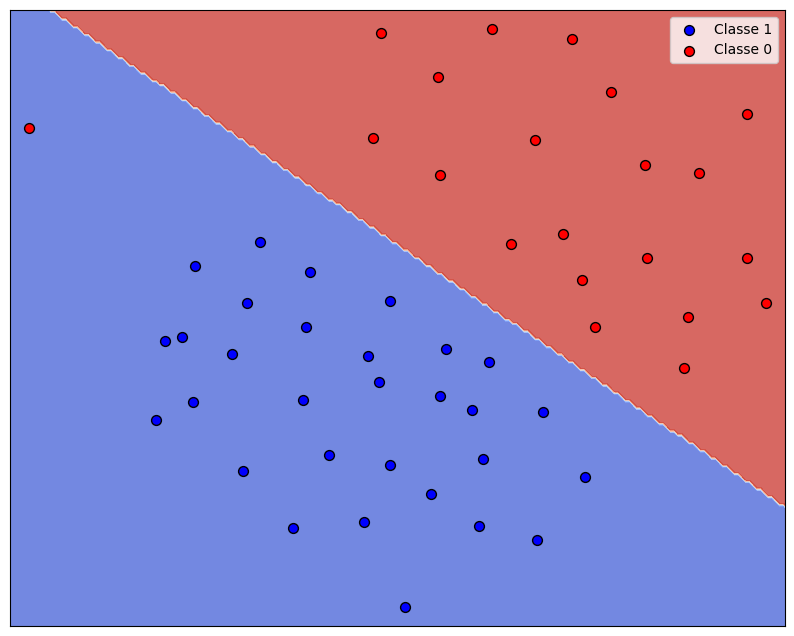

In [8]:
#função para plotar o limite de decisão
def plota_limite_decisao(model, X, Y):

    fig = plt.figure(figsize=(10,8))
    
    ax = plt.gca()
        
    x = X[:, 0]
    y = X[:, 1]
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
        
    Z = fit_model_and_predict(model, X, Y, np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    ax.set_xlim(x.min()-0.1, x.max()+0.1)
    ax.set_ylim(y.min()-0.1, y.max()+0.1)
    ax.set_xticks(())
    ax.set_yticks(())

    #plota os dados da classe 0
    plt.scatter( X[Y==0,0], X[Y==0,1], label='Classe 1', color='blue', s=50, edgecolors='k') 
    
    #plota os dados da classe 1
    plt.scatter( X[Y==1,0], X[Y==1,1], label='Classe 0', color='red', s=50, edgecolors='k') 

    #insere a legenda
    plt.legend()

if __name__ == "__main__":
    # instancia o modelo
    SVM_model = create_SVM_model(C_reg=1.0, kernel_type='linear', gamma_coefficient='scale', random_seed=50)
    
    # plota os dados de treinamento
    plota_limite_decisao(SVM_model, X, Y)
    plt.show()

O gráfico acima apresenta o limite de decisão criado pelo SVM com custo igual a 1. Agora, vamos gerar outro modelo, mas usando custo igual a 100.

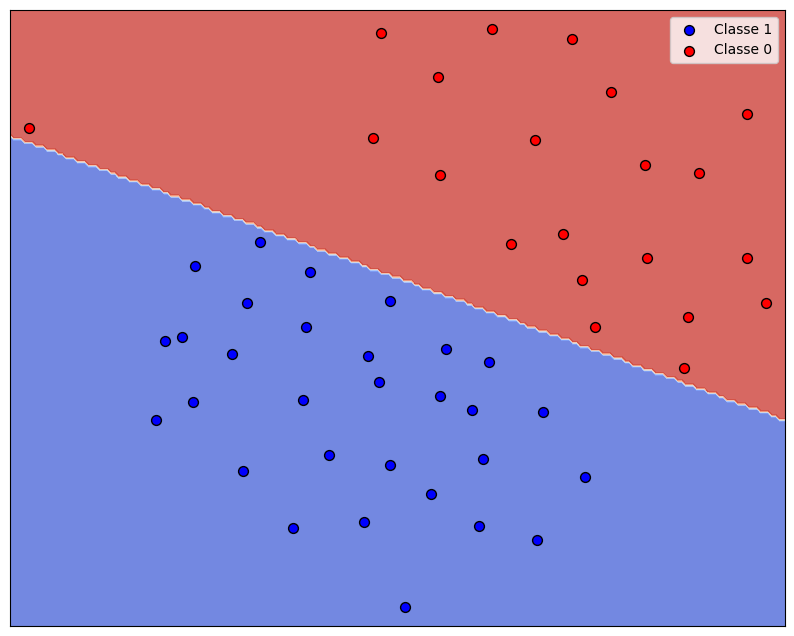

In [9]:
if __name__ == "__main__":
    # instancia o modelo
    SVM_model = create_SVM_model(C_reg=100.0, kernel_type='linear', gamma_coefficient='scale', random_seed=50)

    # plota os dados de treinamento
    plota_limite_decisao(SVM_model, X, Y)
    plt.show()

Conforme pode ser observado nos exemplos acima, quando usamos valores altos para o parâmetro de custo, o SVM tenta classificar todos os exemplos de treinameto corretamente.

Antes de ir para a próxima etapa, você pode testar outros valores de custo para o SVM e verificar como isso afeta o limite de decisão. 

## Parte 3: Treinando o SVM com função de kernel radial

Antes de implementar o SVM com função de kernel radial, vamos importar e visualizar a segunda base de dados.

'X:'

array([[0.107143 , 0.60307  ],
       [0.093318 , 0.649854 ],
       [0.0979263, 0.705409 ],
       [0.15553  , 0.784357 ],
       [0.210829 , 0.866228 ]])

Y: [1 1 1 1 1]


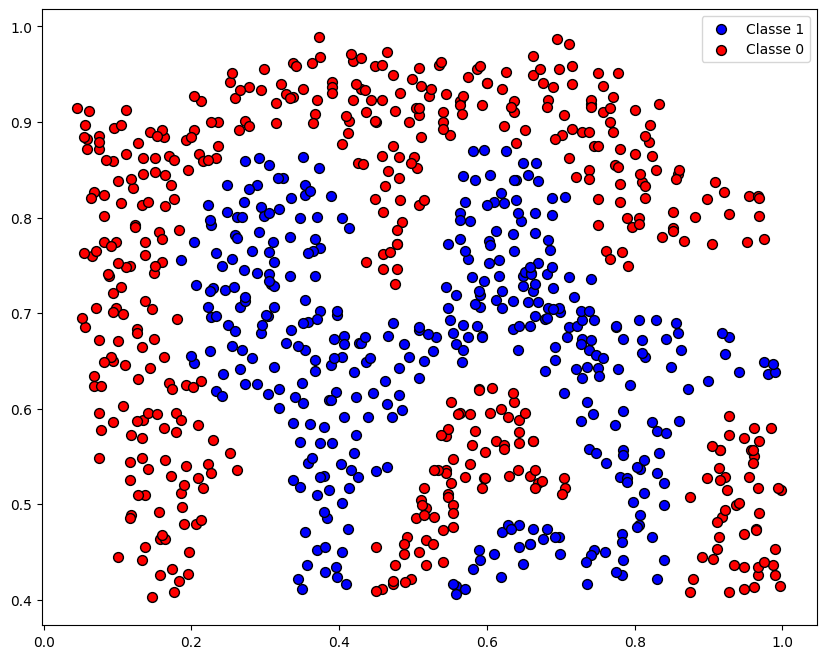

In [10]:
if __name__ == "__main__":
    #importa o arquivo e guarda em um dataframe do Pandas
    df_dataset2 = pd.read_csv(os.path.join(FILES_DIRECTORY, 'data2.csv'), sep=',', index_col=None, header=None)

    #pega os valores das n-1 primeiras colunas e guarda em uma matrix X
    X2 = df_dataset2.iloc[:, 0:-1].values 

    #pega os valores da última coluna e guarda em um vetor Y
    Y2 = df_dataset2.iloc[:, -1].values 

    #imprime as 5 primeiras linhas da matriz X
    display('X:', X2[0:5,:])

    #imprime os 5 primeiros valores de Y
    print('Y:', Y2[0:5])

    #plota os dados de treinamento
    visualizarDados(X2,Y2)
    plt.show()

Agora, vamos treinar o SVM com as amostras dessa segunda base de dados. Dessa vez, vamos usar o kernel radial.

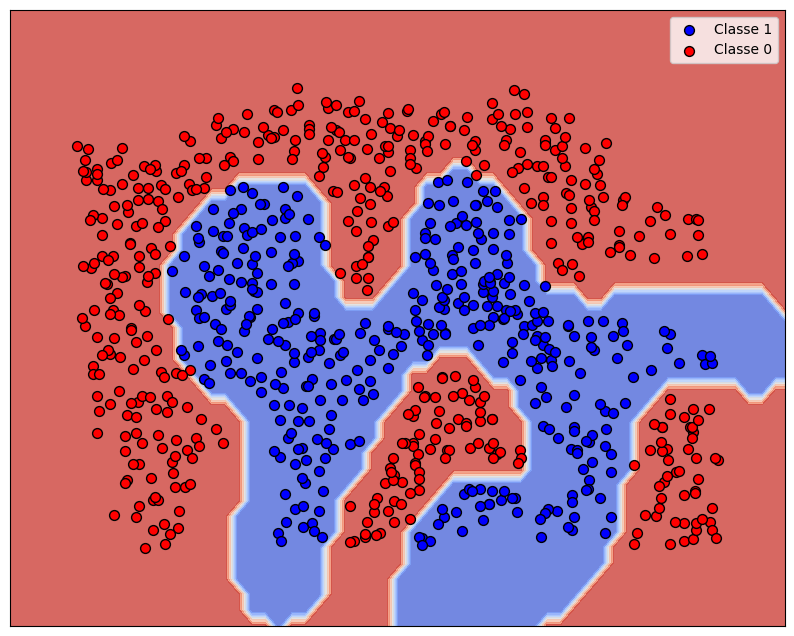

In [11]:
if __name__ == "__main__":
    # instancia o modelo
    SVM_model = create_SVM_model(C_reg=1.0, kernel_type='rbf', gamma_coefficient=100.0, random_seed=50)
    
    # plota os dados de treinamento
    plota_limite_decisao(SVM_model, X2, Y2)
    plt.show()

Você pode testar outros valores para os parâmetros `C_reg` e `gamma_coefficient`. Veja como a escolha desses parâmetros afeta a superfície de decisão criada pelo SVM.

## Parte 4: Experimentos com a base de dados 3

Nesta parte do exercício, faremos experimentos com a terceira base de dados. No experimento, vamos separar parte da base para usarmos como teste. Com o restante, faremos uma busca em grade para encontrar os melhores parâmetros de um modelo SVM de kernel radial, usando para isso o k-fold (busca em grade com validação cruzada, ou _grid search cross-validation_).

Primeiro, vamos carregar os dados.

In [12]:
if __name__ == "__main__":
    # importa o arquivo e guarda em um dataframe do Pandas
    df_dataset3 = pd.read_csv(os.path.join(FILES_DIRECTORY, 'data3.csv'), sep=',', index_col=None, header=None)
    print('Dados carregados com sucesso!')

    # pega os valores das n-1 primeiras colunas e guarda em uma matrix X
    X3 = df_dataset3.iloc[:, 0:-1].values 

    # pega os valores da última coluna e guarda em um vetor Y
    Y3 = df_dataset3.iloc[:, -1].values 

    # imprime as 5 primeiras linhas da matriz X
    display('X:', X3[0:5,:])

    # imprime os 5 primeiros valores de Y
    print('Y:', Y[0:5])

Dados carregados com sucesso!


'X:'

array([[-0.158986,  0.423977],
       [-0.347926,  0.47076 ],
       [-0.504608,  0.353801],
       [-0.596774,  0.114035],
       [-0.518433, -0.172515]])

Y: [1 1 1 1 1]


Em seguida, vamos separar nossa base de teste.

Você deverá então completar a função `holdout()`, que recebe como parâmetro um conjunto de dados, um vetor de amostras e uma porcentagem para o tamanho da base de treinamento. Sua implementação deverá fazer a separação em treino e teste usando a função `sklearn.model_selection.train_test_split` (documentação [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). 

**Importante**: os dados devem ser separados na mesma ordem que informados. Dessa forma, não deve ser feita nenhuma alteração na ordem das amostras.

In [19]:
def holdout(X, Y, pTrain):
    """
    Separe a base X em uma base de treinamento e uma de teste, de acordo com pTrain 
        usando a função train_test_split do sklearn. Os dados devem ser divididos
        na mesma ordem em que foram informados.
    
    Parâmetros
    ----------        
    X: conjunto de dados
    
    Y: rótulos da base
    
    pTrain: porcentagem da base separada para treinamento (a base de teste será o complemento)
    
    Retorno
    -------
    X_train, Y_train: amostras e rótulos da base de treinamento
    
    X_test, Y_test: amostras e rótulos da base de teste
    """            
    
    # importa a função de separação da base
    from sklearn.model_selection import train_test_split    
    
    # inicializa as variaveis que devem ser retornadas
    X_train = X_test = np.zeros(X.shape)
    Y_train = Y_test = np.zeros(Y.shape)    

    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instruções: Complete o código para dividir o conjunto de dados em bases de
    #     treinamento e teste, de forma estratificada, utilizando train_test_split.
    #    
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=pTrain, shuffle=False)

    ##################################################################################
    
    return X_train, X_test, Y_train, Y_test

if __name__ == "__main__":
    # executa a separação
    X3_train, X3_test, Y3_train, Y3_test = holdout(X3, Y3, 0.7)

    # compara os resultados
    print("Número de amostras do treinamento:", len(X3_train))
    print("\t(valor esperado: 287)\n")

    print("Número de amostras do teste:", len(X3_test))
    print("\t(valor esperado: 124)\n")

    print("\nPrimeira amostra da base de teste: ")
    print("\tatributos:", X3_test[0])
    print("\tclasse:", Y3_test[0])
    print("\nValores esperados: ")
    print("\tatributos: [ 0.16669776 -0.66180432]")
    print("\tclasse: 0")

Número de amostras do treinamento: 287
	(valor esperado: 287)

Número de amostras do teste: 124
	(valor esperado: 124)


Primeira amostra da base de teste: 
	atributos: [ 0.16669776 -0.66180432]
	classe: 0

Valores esperados: 
	atributos: [ 0.16669776 -0.66180432]
	classe: 0


Com os conjuntos de dados devidamente separados, podemos gerar gráficos para visualiza-los.

Treinamento:


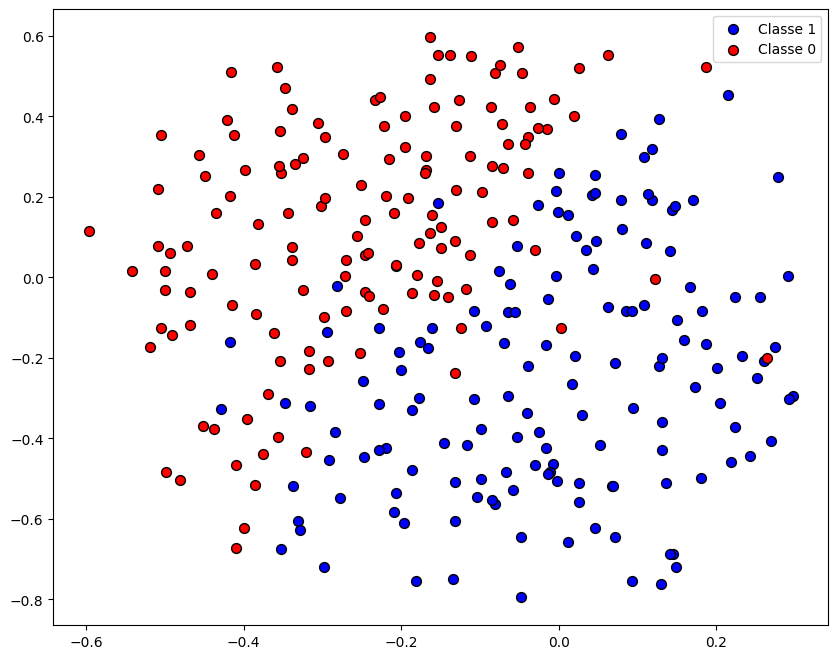


Teste:


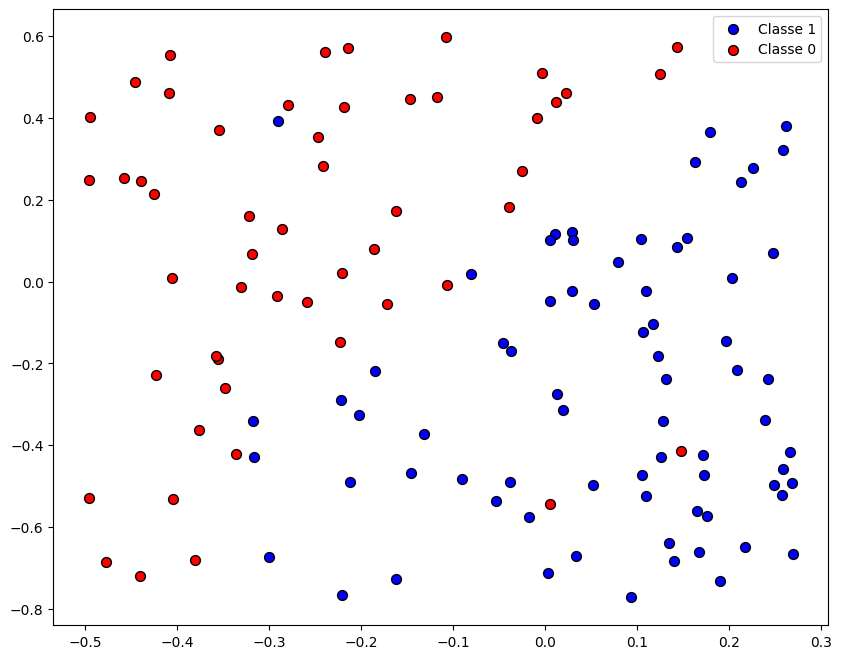

In [20]:
if __name__ == "__main__":
    # plota os dados do treinamento
    print("Treinamento:")
    visualizarDados(X3_train, Y3_train)
    plt.show()
    
    # plota os dados do teste
    print("\nTeste:")
    visualizarDados(X3_test, Y3_test)
    plt.show()

Agora iremos usar a base de treinamento para encontrar os melhores parâmetros para um SVM com kernel radial. Isso será feito através de um K-fold, através de uma métrica específica definida na função.

Para isso, você deverá completar a função `grid_search_cross_validation()`. A função receberá a base de dados de treinamento, um valor K que representa o número de partições para o K-fold, uma métrica de avaliação (acurácia, f-medida, etc.), uma lista de valores para os parâmetros $C$ (`C_reg`, parâmetro de regularização do SVM), $\gamma$ (`gamma_coefficient`, parâmetro do kernel RBF) e tipo de kernel, e uma semente randômica.

Sua implementação deve gerar um dicionário relacionando o nome do parâmetro com os valores a serem testados, e encontrar a melhor combinação de valores e o resultado máximo atingido na métrica por meio do objeto `GridSearchCV` (documentação [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)).

**Importante**: ainda que seja passado apenas um valor para a semente randômica, você deve inseri-la no dicionário de parâmetros, como se fosse mais um parâmetro do modelo a ser testado. Isso é feito para garantir que os resultados serão reproduziveis, batendo com os resultados esperados pelo judge.

In [26]:
def grid_search_cross_validation(X, Y, K, metric, C_reg_values, kernel_types, gamma_coefficient_values, random_seed):
    """
    Executa busca em grade com validação cruzada (K-fold) através do objeto GridSearchCV do sklearn, retornando
        a melhor combinação de parâmetro e o melhor resultado para uma determinada métrica atingido pelo SVM.
    
    Parâmetros
    ----------        
    X: base de treinamento
    
    Y: rótulos da base de treinamento
    
    K: número de partições do K-Fold
    
    metric: métrica utilizada
    
    C_reg_values: valores testados para o parâmetro C de regularização
    
    kernel_types: lista com diferentes tipos de kernels que serão testados
    
    gamma_coefficient_values: valores testados para o parâmetro gamma de coeficiente do kernel
    
    random_seed: semente randômica para possibilitar a reprodução dos resultados
    
    Retorno
    -------
    best_params: melhores parâmetros para o modelo
    
    best_score: melhor valor alcançado da métrica            
    """            
    
    # importa o objeto do grid search e do SVM
    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVC
    
    # inicializa as variaveis que devem ser retornadas
    best_params = {'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale', 'random_state': None}
    best_score = 0.0

    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instruções: Complete o código para executar a busca em grade com validação 
    #     cruzada através do objeto GridSearchCV, retornando os melhores parâmetros
    #     e resultado para a métrica em questão.
    #
    #  Primeiro, você deverá gerar um dicionário com os valores a serem testados,
    #     atentando-se para utilizar os nomes corretos dos parâmetros do SVM
    #
    #  IMPORTANTE: você deve passar a semente randômica dentro do dicionário de parâmetros,
    #     como se fosse mais um parâmetro a ser testado, ainda que com só um valor!
    #  
    #  Em seguida, você deve inicializar o objeto, passando os parâmetros adequados, e     
    #     executar a busca em grade por meio do método fit.
    #
    #  Os melhores parâmetros e resultados estarão disponíveis como atributos do objeto
    #
    
    model = SVC()

    params = {
        'C': C_reg_values,
        'kernel': kernel_types,
        'gamma': gamma_coefficient_values,
        'random_state': [random_seed]
    }

    clf = GridSearchCV(model, params, scoring=metric, cv=K)
    clf.fit(X, Y)

    best_params = clf.best_params_
    best_score = clf.best_score_
    
    ##################################################################################
    
    return best_params, best_score


if __name__ == "__main__":
    # executa a busca em grade
    best_params, best_score = grid_search_cross_validation(
        X=X3_train, Y=Y3_train, K=3, metric='f1', 
        C_reg_values=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
        kernel_types=['rbf'],
        gamma_coefficient_values=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30], 
        random_seed=150
    )

    # compara os resultados
    print("Resultados obtidos:")
    print("\t Melhores parâmetros:", best_params)
    print("\t Melhor score:", best_score)

    print("\nValores esperados:")
    print("\t Melhores parâmetros: {'C': 3, 'gamma': 10, 'kernel': 'rbf', 'random_state': 150}")
    print("\t Melhor score: 0.943486 (aprox.)")

Resultados obtidos:
	 Melhores parâmetros: {'C': 3, 'gamma': 10, 'kernel': 'rbf', 'random_state': 150}
	 Melhor score: 0.943485572774306

Valores esperados:
	 Melhores parâmetros: {'C': 3, 'gamma': 10, 'kernel': 'rbf', 'random_state': 150}
	 Melhor score: 0.943486 (aprox.)


Tendo encontrado os melhores parâmetros, podemos então gerar uma nova instância do modelo e fazer a predição da base de testes, utilizando as funções previamente implementadas.

In [27]:
if __name__ == "__main__":
    # gera uma nova instância do modelo com os melhores parâmetros
    model = create_SVM_model(
        C_reg = best_params['C'], 
        kernel_type = best_params['kernel'], 
        gamma_coefficient = best_params['gamma'], 
        random_seed = best_params['random_state']
    )

    # realiza a predição
    Y3_pred = fit_model_and_predict(model, X3_train, Y3_train, X3_test)

    # verifica a predição
    print("Valores reais:")
    print(Y3_test)
    print("\nValores previstos:")
    print(Y3_pred)

Valores reais:
[0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0
 1 0 1 0 0 1 1 1 1 0 0 0 0]

Valores previstos:
[0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0
 1 0 1 0 0 1 1 1 0 0 0 0 0]


Com as classes previstas, podemos então calcular a qualidade do modelo treinado através de várias das métricas vistas ao longo da disciplina. 

Para isso, você deverá completar a função `calculate_metris`, que irá receber dois vetores de rótulos (um real e um previsto), e calcular a **acurácia**, a **precisão**, a **revocação** e a **f-medida**. Para todas as métricas, você deve usar as funções prontas do numpy. Mais informações sobre estas e outras métricas podem ser vistas [aqui](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

In [29]:
def calculate_metrics(Y_real, Y_pred):
    """
    Calcula a acurácia, precisão, revocação e f-medida da classificação usando funções prontas do scikit
    
    Parâmetros
    ----------        
    Y_real: valor real
    
    Y_pred: valor previsto pelo modelo
            
    Retorno
    -------
    acc: acurácia da classificação
    
    prec: precisão da classificação
    
    rec: revocação da classificação
    
    f1: f-medida da classificação
    """            
    
    # importa as funções de cálculo das métricas
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score    
    
    # inicializa as variaveis que devem ser retornadas
    acc = prec = rec = f1 = 0.0

    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instruções: Complete o código para calcular diversas métricas da classficiação
    #     utilizando as funções prontas do scikit-learn
    #
    
    acc = accuracy_score(Y_real, Y_pred)
    prec = precision_score(Y_real, Y_pred)
    rec = recall_score(Y_real, Y_pred)
    f1 = f1_score(Y_real, Y_pred)

    ##################################################################################
    
    return acc, prec, rec, f1

if __name__ == "__main__":
    # calcula as métricas para a predição
    acc, prec, rec, f1 = calculate_metrics(Y3_test, Y3_pred)

    # compara resultados
    print("Valores calculados")
    print("\t Acurácia:", acc)
    print("\t Precisão:", prec)
    print("\tRevocação:", rec)
    print("\t F-medida:", f1)

    print("\nValores esperados (aprox.)")
    print("\t Acurácia: 0.943548")
    print("\t Precisão: 0.978723")
    print("\tRevocação: 0.884615")
    print("\t F-medida: 0.929293")

Valores calculados
	 Acurácia: 0.9435483870967742
	 Precisão: 0.9787234042553191
	Revocação: 0.8846153846153846
	 F-medida: 0.9292929292929293

Valores esperados (aprox.)
	 Acurácia: 0.943548
	 Precisão: 0.978723
	Revocação: 0.884615
	 F-medida: 0.929293


Podemos então verificar como ficou a superfície de decisão.

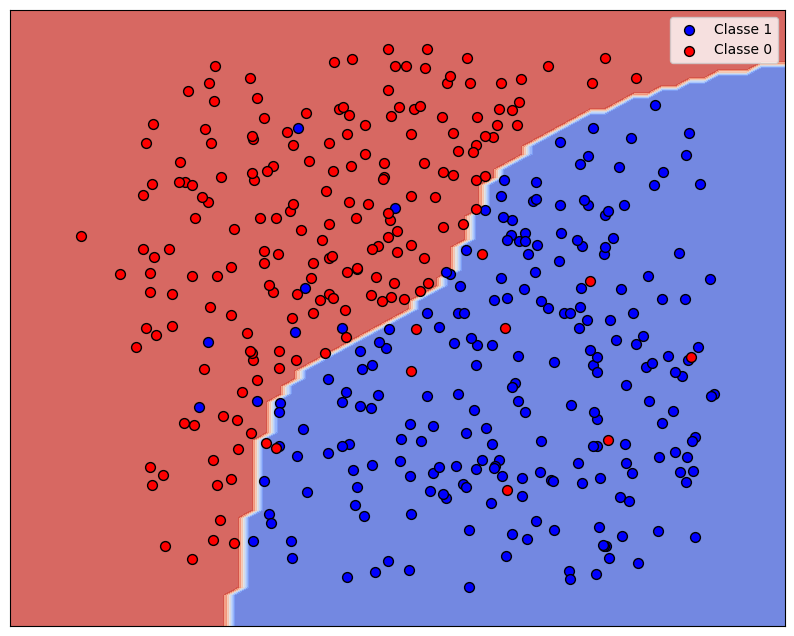

In [30]:
if __name__ == "__main__":
    # plota a superfície de decisão
    plota_limite_decisao(model, X3, Y3)

## Parte 4: Classificação de spam

Nesta parte do exercício, usaremos o SVM para classificar SMS spam.

Veja alguns exemplos de SMS legítimos:
 * ```Is that seriously how you spell his name?```
 * ```What you thinked about me. First time you saw me in class.```
 * ```Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.```
 
Agora veja alguns exemplos de SMS spam:
 * ```WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.```
 * ```Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged.```
 * ```Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs http://www.Ldew.com1win150ppmx3age16.```

Antes de fazer a classificação dos textos, os seguintes pré-processamentos são realizados:

 - deixar todas as palavras com letras minúsculas
 - substituir os números pela palavra *number*
 - substituir todas as URLS pela palavra *enderecoweb*
 - substiuir todos os emails pela palavra *enderecoemail*
 - substituir o símbolo de dólar pela palavra *dolar*
 - substituit todos os caracteres não-alfanuméricos por um espaço em branco
 
Por fim, também iremos eliminar todas as palavras muito curtas. Vamos eliminar qualquer palavra de apenas 1 caracter. 

Para o pré-processamento, iremos usar a função `preprocessing()` que se encontra no arquivo **funcoesAuxiliares.py**.

In [31]:
if __name__ == "__main__":
    # importa a funcao de preprocessamento
    from funcoesAuxiliares import preprocessing

    smsContent = 'Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs http://www.Ldew.com1win150ppmx3age16.'
    print('Antes do preprocessamento: \n', smsContent)

    # chama a função de pré-processsamento para tratar o email
    smsContent = preprocessing(smsContent)

    print('\nDepois do preprocessamento: \n', smsContent)

Antes do preprocessamento: 
 Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs http://www.Ldew.com1win150ppmx3age16.

Depois do preprocessamento: 
 congratulations ur awarded number of cd vouchers or numbergift guaranteed free entry number number wkly draw txt music to number tncs enderecoweb


Depois de fazer o pré-processamento, é necessário transformar o texto em um vetor de atributos com valores numéricos. Uma das formas de fazer isso é considerar que cada palavra da base de dados de treinamento é um atributo, cujo valor é o número de vezes que ela aparece em uma determinada mensagem.

Para facilitar, já existe um vocabulário no arquivo *vocab.txt* que foi previamente extraído. Cada palavra desse vocabulário será considerado um atributo do problema de classificação de spam.

O código abaixo carrega o vocabulário.

In [32]:
if __name__ == "__main__":
    # importa o vocabulario
    vocabulario = []
    with open(os.path.join(FILES_DIRECTORY, 'vocab.txt'), 'r') as f:
        for line in f:
            line = line.replace('\n','')
            vocabulario.append(line)

    # apresenta as primeiras palavras do vocabulário
    print('50 primeiras palavras do vocabulário:\n')
    print(vocabulario[0:50])

50 primeiras palavras do vocabulário:

['aah', 'aathi', 'abi', 'ability', 'abiola', 'able', 'about', 'abt', 'abta', 'ac', 'academic', 'acc', 'accept', 'access', 'accident', 'accidentally', 'accordingly', 'account', 'ache', 'across', 'acting', 'action', 'activate', 'activities', 'actor', 'actual', 'actually', 'ad', 'add', 'addamsfa', 'added', 'address', 'administrator', 'admirer', 'admit', 'adore', 'adult', 'advance', 'advice', 'advise', 'affairs', 'affection', 'afraid', 'aft', 'after', 'afternoon', 'aftr', 'ag', 'again', 'against']


Agora, iremos usar a função `text2features()` que se encontra no arquivo **funcoesAuxiliares.py** para converter a mensagem em um vetor de atributos. O $i-\text{ésimo}$ atributo corresponderá à $i-\text{ésima}$ palavra do vocabulário e receberá valor 1 se a palavra estiver no email e zero caso não esteja.

In [33]:
if __name__ == "__main__":
    # importa a funcao 
    from funcoesAuxiliares import text2features

    # converte o texto para um vetor de features
    smsVec = text2features(smsContent, vocabulario)

    print('Vetor de features correspondente ao SMS:')
    print(smsVec)

Vetor de features correspondente ao SMS:
[[0 0 0 ... 0 0 0]]


### Parte 4.1: Treinando o SVM

Nesta parte do exercício, nós iremos usar uma base de dados de treinamento que já foi pré-processada e convertida em vetores de atributos. O arquivo *spamData.npz* contém 3901 exemplos de SMS spam e verídicos para treinamento e 1673 exemplos de teste.

Primeiro, vamos carregar o arquivo.

In [34]:
if __name__ == "__main__":
    # importa o arquivo numpy
    dataset4_train = np.load('dados/spamData.npz')['train']
    dataset4_test = np.load('dados/spamData.npz')['test']

    # pega os valores das n-1 primeiras colunas e guarda em uma matrix X
    X4_train = dataset4_train[:, 0:-1]
    X4_test = dataset4_test[:, 0:-1]

    # pega os valores da última coluna e guarda em um vetor Y
    Y4_train = dataset4_train[:, -1] 
    Y4_test = dataset4_test[:, -1] 

    # imprime as 5 primeiras linhas da matriz X
    display('X_train:', X4_train[0:5,:])
    display('X_test:', X4_test[0:5,:])

    # imprime os 5 primeiros valores de Y
    print('Y_train:', Y4_train[0:5])
    print('Y_test:', Y4_test[0:5])

'X_train:'

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

'X_test:'

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Y_train: [0 0 1 1 0]
Y_test: [1 0 0 0 0]


Agora vamos treinar o SVM com os dados de treinamento. Para escolher os melhores parâmetros, vamos fazer uma busca em grade com validação cruzada, usando valor $K = 3$ para o K-fold.

**Obs.:** o grid search pode levar alguns minutos com essa base de dados

In [35]:
if __name__ == "__main__":
    # antes de executar a busca em grade, é importante embaralhar os dados

    # gera os indices aleatorios que irao definir a ordem dos dados
    # usa uma semente na randomização para que em toda a execução os dados sejam os mesmos
    idx_perm = np.random.RandomState(seed=10).permutation(range(X4_train.shape[0]))

    # ordena os dados de acordo com os indices gerados aleatoriamente
    X4_train, Y4_train = X4_train[idx_perm, :], Y4_train[idx_perm]

    # chama a função que faz a busca em grade
    best_params, best_score = grid_search_cross_validation(
        X=X4_train, Y=Y4_train, K=3, metric='f1', 
        C_reg_values=[0.1, 10],
        kernel_types=['rbf'],
        gamma_coefficient_values=[0.1, 10], 
        random_seed=10
    )    
    print("Resultados obtidos:")
    print("\t Melhores parâmetros:", best_params)
    print("\t Melhor score:", best_score)

Resultados obtidos:
	 Melhores parâmetros: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 10}
	 Melhor score: 0.842231640864326


Agora que escolhemos os melhores parâmetros, podemos treinar o SVM e usá-lo para fazer a predição das amostras de teste.

In [36]:
if __name__ == "__main__":
    # gera uma nova instância do modelo com os melhores parâmetros
    model = create_SVM_model(
        C_reg = best_params['C'], 
        kernel_type = best_params['kernel'], 
        gamma_coefficient = best_params['gamma'], 
        random_seed = best_params['random_state']
    )

    # realiza a predição
    Y4_pred = fit_model_and_predict(model, X4_train, Y4_train, X4_test)

    # calcula as métricas para a predição
    acc, prec, rec, f1 = calculate_metrics(Y4_test, Y4_pred)

    # verifica os resultados
    print("Valores calculados")
    print("\t Acurácia:", acc)
    print("\t Precisão:", prec)
    print("\tRevocação:", rec)
    print("\t F-medida:", f1)

Agora vamos testar o classificador que foi treinado em outro exemplo de SMS.

In [ ]:
if __name__ == "__main__":
    sms_content = 'Ringtone Club: Get the UK singles chart on your mobile each week and choose any top quality ringtone! This message is free of charge.'
    print(sms_content) 

    # chama a função de pré-processsamento para tratar o email
    sms_content = preprocessing(smsContent)

    # converte o texto para um vetor de features
    sms_vec = text2features(smsContent, vocabulario)

    # classifica o email    
    sms_pred = fit_model_and_predict(model, X4_train, Y4_train, smsVec)[0]

    print('\nClasse predita pelo classificador: %d' %sms_pred)

Neste exemplo, foi empregado o SVM com *kernel* radial para o problema de SMS spam para mostrar como os parâmetros custo e gamma podem influenciar o resultado. Porém, como as amostras são altamente esparsas e contém muitos atributos, é recomendado que seja usado o *kernel* linear.